In [2]:
from edgedroid.models.timings import *
import pandas as pd
from collections import deque

dfs = deque()
for neuroticism, neuro_tag in ((0.0, "low"), (1.0, "high")):
    eetm = EmpiricalETM(neuroticism, ttf_levels=8, cleanup=CleanupMode.TRUNCATE)

    for state, exec_times in eetm._views.items():
        df = pd.DataFrame(data=exec_times, columns=["exec_time"])
        df["state"] = state
        df["neuroticism"] = neuro_tag
        dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
data["state"] = data["state"].astype("category")
data["neuroticism"] = data["neuroticism"].astype("category")
data

,exec_time,state,neuroticism
0,4.438645,"(-inf, 0.7630967103759919]",low
1,2.943222,"(-inf, 0.7630967103759919]",low
2,5.405761,"(-inf, 0.7630967103759919]",low
3,5.225161,"(-inf, 0.7630967103759919]",low
4,4.780642,"(-inf, 0.7630967103759919]",low
...,...,...,...
6064,4.683471,"(4.199453495296661, inf]",high
6065,3.094091,"(4.199453495296661, inf]",high
6066,7.327422,"(4.199453495296661, inf]",high
6067,4.884343,"(4.199453495296661, inf]",high


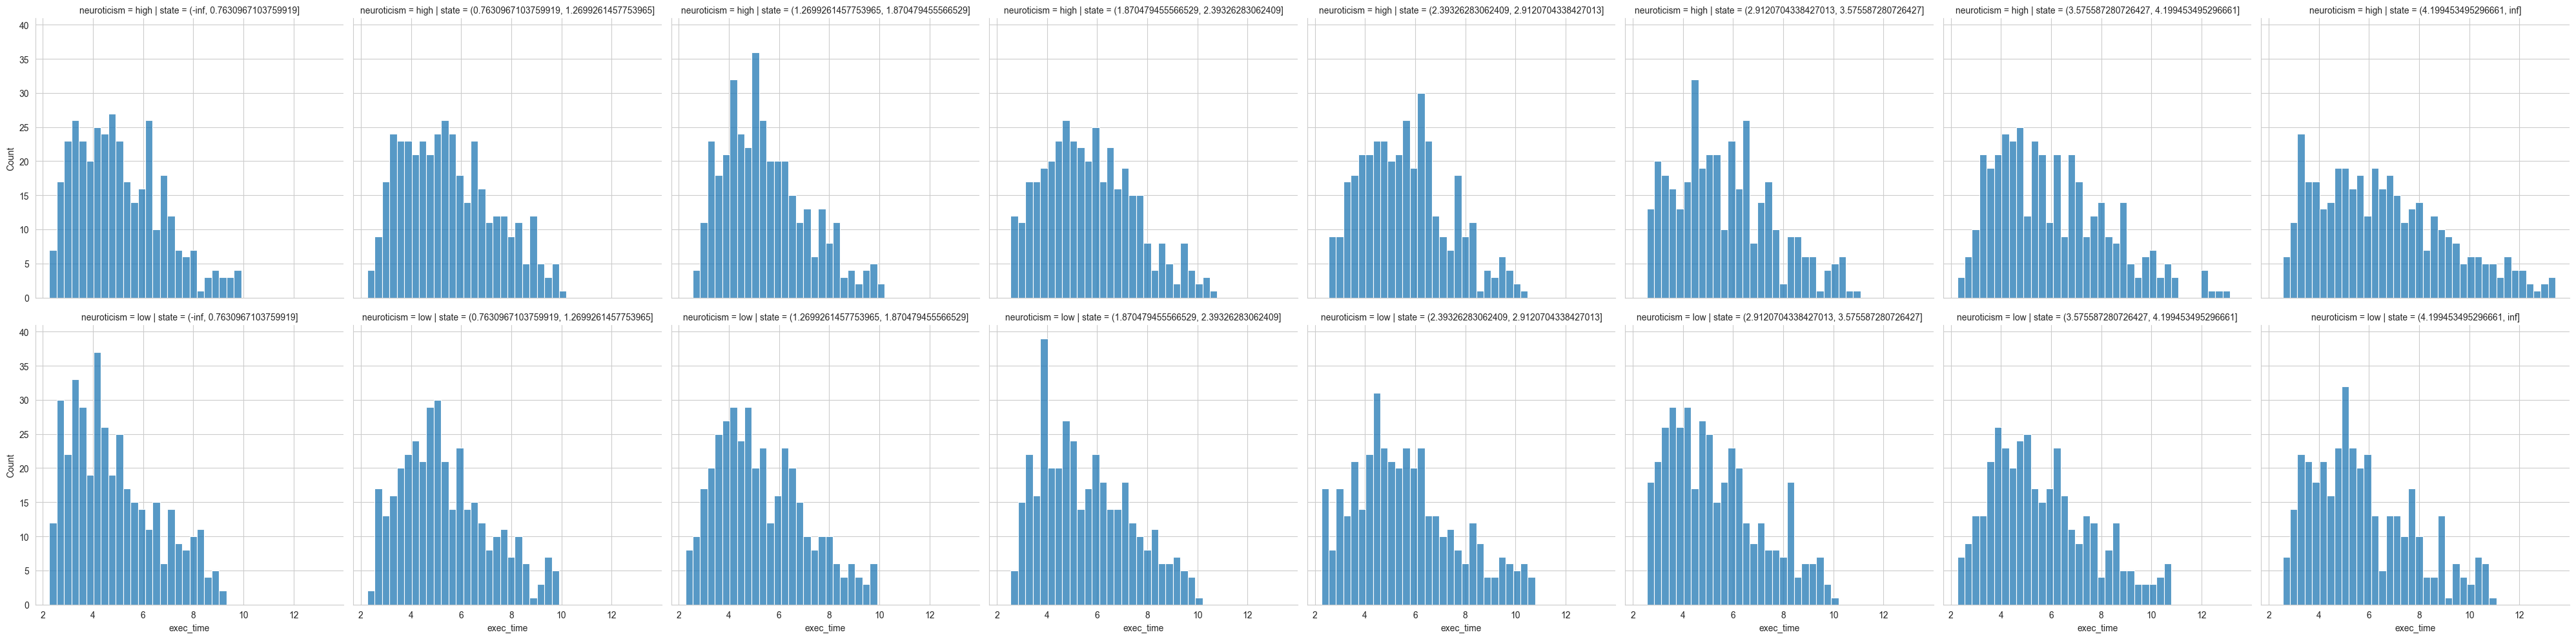

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=data, x="exec_time", col="state", row="neuroticism", kind="hist")
plt.show()


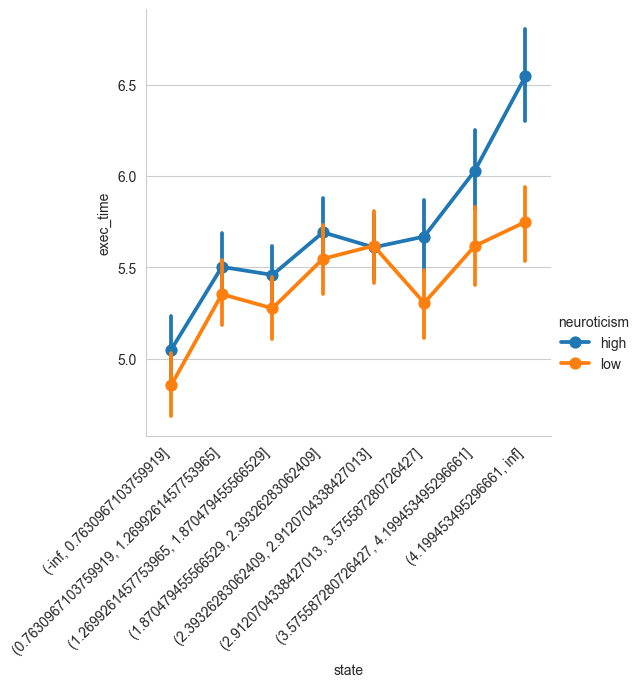

In [6]:
fg = sns.catplot(data=data, x="state", y="exec_time", hue="neuroticism", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
plt.show()